In [2]:
import numpy as np
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.func as func
import mlgrad.avragg as avragg
import mlgrad.gd as gd
import mlgrad.regular as regular
import mlgrad.weights as weights

from mlgrad import averager_it, averager_fg, fg, erm_fg, sg, erm_sg, irgd, erm_irgd, erisk

#import sklearn.linear_model as sklm

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-paper', 'seaborn-white', 'seaborn-ticks'])

In [3]:
df = pd.read_csv("data/NOxEmissions.csv", sep=',', usecols=["julday", "LNOx", "LNOxEm", "sqrtWS"], )

In [5]:
df[:10]

,julday,LNOx,LNOxEm,sqrtWS
0,373,4.457250,5.536489,0.856446
1,373,4.151827,5.513000,1.016612
2,373,3.834061,4.886994,1.095445
3,373,4.172848,5.138912,1.354068
4,373,4.322807,5.666518,1.204159
5,373,5.026181,7.152554,1.147606
6,373,5.137268,7.365265,0.948683
7,373,5.750666,8.085808,1.024695
8,373,5.598977,8.073264,0.983107
9,373,5.179815,7.936809,1.016612


In [28]:
len(df)

8088

In [9]:
X = df["LNOxEm"].values
Y = df["sqrtWS"].values

# X -= X.mean()
# Y -= Y.mean()

Xs = X.reshape((-1,1))

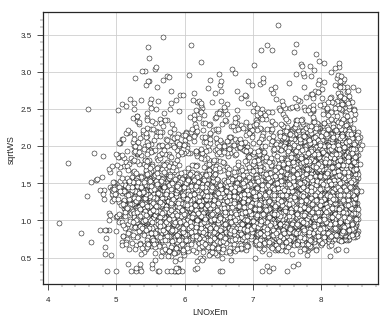

In [10]:
plt.figure(figsize=(6.0, 5.0))
plt.scatter(X, Y, s=25, c='w', edgecolors='k', linewidths=0.5)
plt.minorticks_on()
plt.grid(1)
plt.xlabel('LNOxEm')
plt.ylabel('sqrtWS')
plt.show()

In [6]:
loss_func_sq = loss.ErrorLoss(func.Square())
loss_func_abs = loss.ErrorLoss(func.Absolute())

In [7]:
#regular_func = regular.Square()

In [21]:
mod1 = model.LinearModel(1)
mod1.init_param()

Completed? True


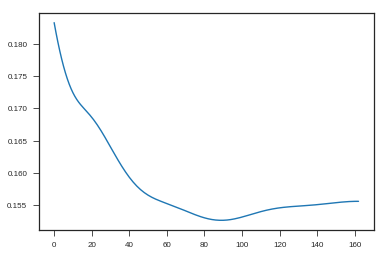

In [22]:
er1 = erisk(Xs, Y, mod1, loss_func_sq)
alg_fg1 = erm_fg(er1, h=0.01, tol=1.0e-6, verbose=0)
print("Completed?", alg_fg1.completed)

plt.plot(alg_fg1.lvals)
plt.show()

In [23]:
mod2 = model.LinearModel(1)
mod2.init_param()

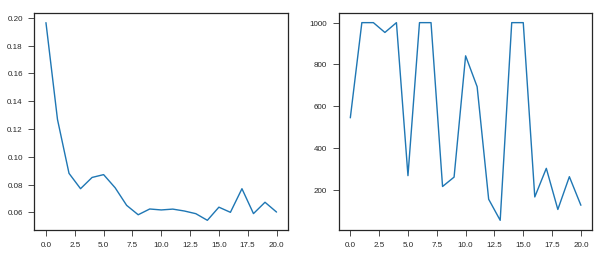

In [24]:
er2 = erisk(Xs, Y, mod2, loss_func_sq)
alg_fg2 = fg(er2, h=0.001, tol=1.0e-7)
avg2 = averager_it(func.QuantileFunc(0.78, func.Sqrt(0.001)))
avg2 = avragg.MWAverage(avg2)
wg2 = weights.MWeights(avg2, er2)
irgd2 = erm_irgd(alg_fg2, wg2, n_iter=21, verbose=0)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(irgd2.lvals)
plt.subplot(1,2,2)
plt.plot(irgd2.n_iters)
plt.show()

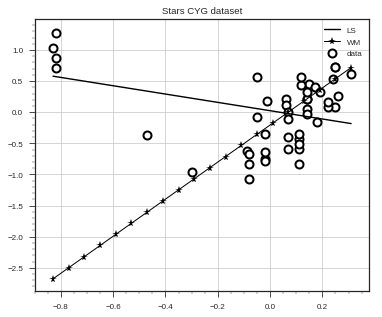

In [25]:
plt.figure(figsize=(6.0, 5.0))
plt.title('Stars CYG dataset')
plt.scatter(X, Y, s=64, c='w', edgecolors='k', linewidths=2., label='data')
X0 = np.linspace(X.min(), X.max(), 20)
plt.plot(X0, mod1.evaluate_all(X0.reshape(-1,1)), c='k', markersize=8, label=r'LS')
plt.plot(X0, mod2.evaluate_all(X0.reshape(-1,1)), color='k', linewidth=1., marker='*', markersize=8, label=r'WM')
plt.minorticks_on()
plt.grid(1)
#plt.xlabel('log.Te')
#plt.ylabel('log.light')
#plt.xlim(-0.05, 1.1)
plt.legend(loc='best')
plt.show()

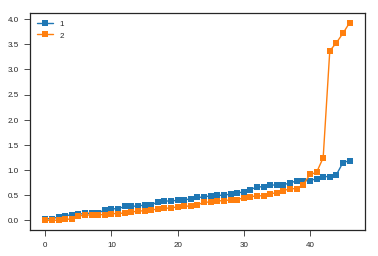

In [26]:
res1 = np.abs(Y - mod1.evaluate_all(Xs))
res1.sort()
res2 = np.abs(Y - mod2.evaluate_all(Xs))
res2.sort()
plt.plot(res1, marker='s', label='1')
plt.plot(res2, marker='s', label='2')
plt.legend()
plt.show()

In [14]:
# def plot_log(d):
#     plt.figure(figsize=(15,4))
#     m = len(d)
#     i = 1
#     for key, vals in sorted(d.items()):
#         plt.subplot(1, m, i)
#         k_range, u_seq = zip(*enumerate(d[key]))
#         plt.plot(k_range, u_seq, marker='s', markersize=3)
#         plt.grid(1)
#         plt.title(key)
#         plt.minorticks_on()
#         i += 1
#         plt.tight_layout()
#     plt.show()
    
# plot_log(d)

In [16]:
37/47

0.7872340425531915